# Exercise: Estimate power plan output demand
    
http://archive.ics.uci.edu/ml/datasets/combined+cycle+power+plant


Dataset: https://github.com/abulbasar/data/blob/master/Combined_Cycle_Power_Plant.csv

Find rmse and r2 score for training and test dataset.


In [2]:
import pandas as pd
import numpy as np
from sklearn import *
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
df = pd.read_csv("/data/Combined_Cycle_Power_Plant.csv")
df.head()

,AT,V,AP,RH,EP
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


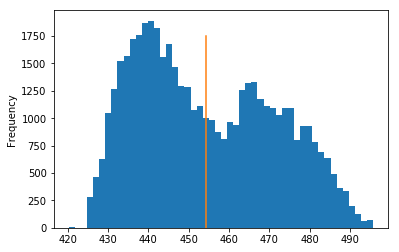

In [8]:
target = "EP"
df[target].plot.hist(bins = 50)
target_mean = df[target].mean()
plt.plot([target_mean, target_mean], [0, 1750])

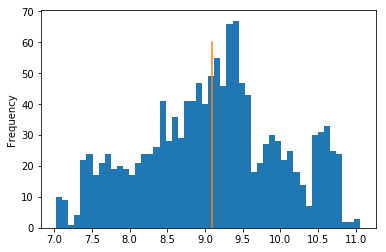

In [88]:
np.log(df.charges).plot.hist(bins = 50)
charges_mean = np.log(df.charges).mean()
plt.plot([charges_mean, charges_mean], [0, 60])

In [11]:
target = "EP"
y = np.log(df[target])
X = df.copy()
del X[target]
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                        test_size = 0.3, random_state = 1)
print("X_train", X_train.shape, "X_test", X_test.shape)



pipe = pipeline.Pipeline([
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LinearRegression())
])

pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print("\ntraining mse", metrics.mean_squared_error(y_train, y_train_pred),
      "\ntest mse", metrics.mean_squared_error(y_test, y_test_pred),
      "\ntraining R2", metrics.r2_score(y_train, y_train_pred),
      "\ntest R2", metrics.r2_score(y_test, y_test_pred)
     )

X_train (33488, 4) X_test (14352, 4)

training mse 9.787557016553564e-05 
test mse 9.882808699958435e-05 
training R2 0.9298928647544801 
test R2 0.9294444312957376


In [12]:
est = pipe.steps[-1][-1]
pd.DataFrame({"feature": X.columns, "coef": est.coef_})

,coef,feature
0,-0.031743,AT
1,-0.006937,V
2,0.000977,AP
3,-0.004887,RH
